In [2]:
import os
import math

import pandas as pd
from numpy import arange, mean, std
from sklearn import preprocessing
import numpy as np

import json

In [2]:
# import csv
df = pd.read_csv("C:\\Users\\giuli\\Desktop\\ds Left\\merged\\mergedFileLeft.csv")
df
# print(df.describe())

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin,View,User,Hand,Smartphone
0,0.137554,0.064636,0.356773,0.127287,1.051056,-0.110138,2.961190,3.021484,0.322891,0.104259,...,1.0,1.0,0.0,0.0,1.0,1.0,t,Chiara,LEFT,REALME 7
1,0.590167,0.679947,0.403956,0.163180,1.103729,-0.134079,2.469620,2.303223,0.459437,0.211083,...,1.0,1.0,0.0,0.0,1.0,1.0,h,Chiara,LEFT,REALME 7
2,0.331192,0.325607,0.397967,0.158378,1.027115,0.009567,2.721668,2.700653,0.293869,0.086359,...,1.0,1.0,0.0,0.0,1.0,1.0,e,Chiara,LEFT,REALME 7
3,-0.447721,-0.495605,0.349624,0.122237,0.090973,-0.988815,2.018710,2.047043,0.283701,0.080486,...,1.0,1.0,0.0,0.0,1.0,1.0,,Chiara,LEFT,REALME 7
4,0.395437,0.402222,0.179063,0.032064,0.622482,0.074219,1.259748,1.280899,0.191081,0.036512,...,1.0,1.0,0.0,0.0,1.0,1.0,r,Chiara,LEFT,REALME 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,0.292690,0.304062,0.022743,0.000517,0.304062,0.258575,0.882263,0.871490,0.021545,0.000464,...,1.0,1.0,0.0,0.0,1.0,1.0,,Chiara,LEFT,REALME 7
16758,-0.699108,-0.713470,0.028725,0.000825,-0.656021,-0.713470,1.756138,1.903381,0.294487,0.086723,...,1.0,1.0,0.0,0.0,1.0,1.0,z,Chiara,LEFT,REALME 7
16759,-1.127679,-1.065430,0.085239,0.007266,-1.065430,-1.221054,1.631400,1.620865,0.014425,0.000208,...,1.0,1.0,0.0,0.0,1.0,1.0,a,Chiara,LEFT,REALME 7
16760,0.440536,0.440536,0.000000,0.000000,0.440536,0.440536,1.857895,1.857895,0.000000,0.000000,...,1.0,1.0,0.0,0.0,1.0,1.0,c,Chiara,LEFT,REALME 7


In [3]:
# Normalization between -1 and 1
df_norm = df.copy()

notnorm = ['View','User', 'Hand', 'Smartphone']
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

for col in list(df_norm.columns):
    if col in notnorm:
        continue
    x = df_norm[[col]].values.astype(float) # cast to float
    x_scaled = min_max_scaler.fit_transform(x) # fit data and transform it
    df_norm[[col]] = x_scaled

In [4]:
df_norm.describe()
df = df_norm
df

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin,View,User,Hand,Smartphone
0,-0.132653,-0.147185,-0.603221,-0.921283,0.032926,-0.109151,0.273847,0.271777,-0.630290,-0.931657,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,t,Chiara,LEFT,REALME 7
1,-0.021683,-0.003086,-0.550748,-0.899086,0.045203,-0.114663,0.140869,0.087105,-0.473945,-0.861633,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,h,Chiara,LEFT,REALME 7
2,-0.085178,-0.086068,-0.557407,-0.902056,0.027346,-0.081589,0.209052,0.189288,-0.663520,-0.943391,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,e,Chiara,LEFT,REALME 7
3,-0.276150,-0.278387,-0.611171,-0.924406,-0.190848,-0.311467,0.018891,0.021238,-0.675163,-0.947240,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7
4,-0.069426,-0.068126,-0.800858,-0.980171,-0.066965,-0.066703,-0.186420,-0.175745,-0.781213,-0.976066,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,r,Chiara,LEFT,REALME 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,-0.094617,-0.091114,-0.974706,-0.999680,-0.141182,-0.024254,-0.288535,-0.281008,-0.975331,-0.999696,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7
16758,-0.337784,-0.329409,-0.968054,-0.999490,-0.364956,-0.248069,-0.052138,-0.015699,-0.662813,-0.943152,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,z,Chiara,LEFT,REALME 7
16759,-0.442860,-0.411833,-0.905203,-0.995507,-0.460381,-0.364941,-0.085882,-0.088337,-0.983483,-0.999864,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,a,Chiara,LEFT,REALME 7
16760,-0.058369,-0.059153,-1.000000,-1.000000,-0.109373,0.017642,-0.024612,-0.027394,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,c,Chiara,LEFT,REALME 7


In [5]:
# add letters
letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"," "]
# add distances from left margin (xAxis) and top margin (yAxis) (start from 1)
yAxis = [ 1,  2,  2,  1,  0,  1,  1,  1,  0,  1,  1,  1,  2,  2,  0,  0,  0,  0,  1,  0,  0,  2,  0,  2,  0,  2, 3]
xAxis =[ 1.5,  6,  4,  3.5,  3,  4.5,  5.5, 6.5,  8,  7.5, 8.5,  9.5,  8,  7,  9,  10,  1,  4,  2.5,  5,  7,  5,  2,  3,  6,  2, 5]

# pair of distances for letters
dict_letters = {}
for i, let in enumerate(letters):
    dict_letters[let] = (xAxis[i], yAxis[i])

center = "a"
dict_dist = {}
for let in letters:
    dict_dist[let] = math.sqrt((dict_letters[center][0] - dict_letters[let][0])**2 + (dict_letters[center][1] - dict_letters[let][1])**2)

# write in df distances and dist from center
df.loc[:,'x'] = df.apply(lambda x: dict_letters[x['View']][0], axis=1)
df.loc[:,'y'] = df.apply(lambda x: dict_letters[x['View']][1], axis=1)
df.loc[:,'dist'] = df.apply(lambda x: dict_dist[x['View']], axis=1)
df

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreVar,PreMax,PreMin,View,User,Hand,Smartphone,x,y,dist
0,-0.132653,-0.147185,-0.603221,-0.921283,0.032926,-0.109151,0.273847,0.271777,-0.630290,-0.931657,...,-1.0,-1.0,-1.0,t,Chiara,LEFT,REALME 7,5.0,0,3.640055
1,-0.021683,-0.003086,-0.550748,-0.899086,0.045203,-0.114663,0.140869,0.087105,-0.473945,-0.861633,...,-1.0,-1.0,-1.0,h,Chiara,LEFT,REALME 7,6.5,1,5.000000
2,-0.085178,-0.086068,-0.557407,-0.902056,0.027346,-0.081589,0.209052,0.189288,-0.663520,-0.943391,...,-1.0,-1.0,-1.0,e,Chiara,LEFT,REALME 7,3.0,0,1.802776
3,-0.276150,-0.278387,-0.611171,-0.924406,-0.190848,-0.311467,0.018891,0.021238,-0.675163,-0.947240,...,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7,5.0,3,4.031129
4,-0.069426,-0.068126,-0.800858,-0.980171,-0.066965,-0.066703,-0.186420,-0.175745,-0.781213,-0.976066,...,-1.0,-1.0,-1.0,r,Chiara,LEFT,REALME 7,4.0,0,2.692582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,-0.094617,-0.091114,-0.974706,-0.999680,-0.141182,-0.024254,-0.288535,-0.281008,-0.975331,-0.999696,...,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7,5.0,3,4.031129
16758,-0.337784,-0.329409,-0.968054,-0.999490,-0.364956,-0.248069,-0.052138,-0.015699,-0.662813,-0.943152,...,-1.0,-1.0,-1.0,z,Chiara,LEFT,REALME 7,2.0,2,1.118034
16759,-0.442860,-0.411833,-0.905203,-0.995507,-0.460381,-0.364941,-0.085882,-0.088337,-0.983483,-0.999864,...,-1.0,-1.0,-1.0,a,Chiara,LEFT,REALME 7,1.5,1,0.000000
16760,-0.058369,-0.059153,-1.000000,-1.000000,-0.109373,0.017642,-0.024612,-0.027394,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,c,Chiara,LEFT,REALME 7,4.0,2,2.692582


In [6]:
# Group dataset by letter/distance

# mean = mean of the rows with the same View and distances
df_mean = df.groupby(['View','dist','x','y'], as_index=False).agg('mean')
df_mean

,View,dist,x,y,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,...,GrPitchStd,GrPitchVar,GrPitchMax,GrPitchMin,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin
0,,4.031129,5.0,3,-0.159617,-0.154432,-0.821499,-0.968070,-0.166154,-0.121125,...,-0.800410,-0.964268,0.145335,0.183078,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,a,0.000000,1.5,1,-0.442607,-0.414158,-0.674681,-0.909059,-0.411576,-0.427211,...,-0.625560,-0.894337,0.422748,0.442984,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b,4.609772,6.0,2,0.033203,0.023504,-0.788821,-0.954436,0.030797,0.058167,...,-0.754772,-0.945768,-0.026646,-0.001717,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,c,2.692582,4.0,2,-0.110353,-0.109572,-0.829623,-0.968095,-0.119691,-0.071302,...,-0.734215,-0.938614,0.108551,0.135588,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,d,2.000000,3.5,1,-0.171691,-0.166162,-0.843684,-0.974481,-0.181909,-0.127884,...,-0.738169,-0.943789,0.158329,0.187836,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,e,1.802776,3.0,0,-0.219282,-0.213487,-0.830212,-0.972243,-0.222810,-0.173440,...,-0.747517,-0.947119,0.197392,0.228557,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,f,3.000000,4.5,1,-0.110754,-0.111648,-0.824161,-0.969190,-0.118787,-0.072111,...,-0.755293,-0.951283,0.088726,0.117399,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,g,4.000000,5.5,1,-0.017499,-0.022905,-0.832367,-0.971224,-0.030099,0.015641,...,-0.781298,-0.958011,0.022183,0.052845,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,h,5.000000,6.5,1,0.102653,0.091987,-0.794797,-0.960715,0.092600,0.121151,...,-0.762427,-0.950764,-0.083734,-0.060005,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,i,6.576473,8.0,0,0.289857,0.268957,-0.735985,-0.930639,0.286954,0.288349,...,-0.725372,-0.934015,-0.264608,-0.252564,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# PREPARE A DATAFRAME FOR HEATMAPS: MULTIPLY SPACES TO SHOW MULTIPLE BLOCKS

df_heat = df_mean.copy()

# Duplicate spaces
space_x = df_heat['x'][0]
row = df_heat.iloc[[0],]
SPACEBAR_LEN = 9
BLOCK_SIZE = 0.5
for i in range(SPACEBAR_LEN):
    new_block = space_x - (SPACEBAR_LEN - 1) / 2 * BLOCK_SIZE + i * BLOCK_SIZE
    print(space_x, new_block)
    if new_block == space_x:
        continue

    # append the other rows for spacebar draw
    df_heat = df_heat.append(df_heat.loc[[0] * 1].assign(**{'x': new_block}), ignore_index=True) # 1 is the number of repeats

df_heat

5.0 3.0
5.0 3.5
5.0 4.0
5.0 4.5
5.0 5.0
5.0 5.5
5.0 6.0
5.0 6.5
5.0 7.0


,View,dist,x,y,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,...,GrPitchStd,GrPitchVar,GrPitchMax,GrPitchMin,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin
0,,4.031129,5.0,3,-0.159617,-0.154432,-0.821499,-0.968070,-0.166154,-0.121125,...,-0.800410,-0.964268,0.145335,0.183078,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,a,0.000000,1.5,1,-0.442607,-0.414158,-0.674681,-0.909059,-0.411576,-0.427211,...,-0.625560,-0.894337,0.422748,0.442984,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b,4.609772,6.0,2,0.033203,0.023504,-0.788821,-0.954436,0.030797,0.058167,...,-0.754772,-0.945768,-0.026646,-0.001717,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,c,2.692582,4.0,2,-0.110353,-0.109572,-0.829623,-0.968095,-0.119691,-0.071302,...,-0.734215,-0.938614,0.108551,0.135588,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,d,2.000000,3.5,1,-0.171691,-0.166162,-0.843684,-0.974481,-0.181909,-0.127884,...,-0.738169,-0.943789,0.158329,0.187836,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,e,1.802776,3.0,0,-0.219282,-0.213487,-0.830212,-0.972243,-0.222810,-0.173440,...,-0.747517,-0.947119,0.197392,0.228557,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,f,3.000000,4.5,1,-0.110754,-0.111648,-0.824161,-0.969190,-0.118787,-0.072111,...,-0.755293,-0.951283,0.088726,0.117399,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,g,4.000000,5.5,1,-0.017499,-0.022905,-0.832367,-0.971224,-0.030099,0.015641,...,-0.781298,-0.958011,0.022183,0.052845,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,h,5.000000,6.5,1,0.102653,0.091987,-0.794797,-0.960715,0.092600,0.121151,...,-0.762427,-0.950764,-0.083734,-0.060005,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,i,6.576473,8.0,0,0.289857,0.268957,-0.735985,-0.930639,0.286954,0.288349,...,-0.725372,-0.934015,-0.264608,-0.252564,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<AxesSubplot:title={'center':'Title'}, xlabel='x', ylabel='y'>

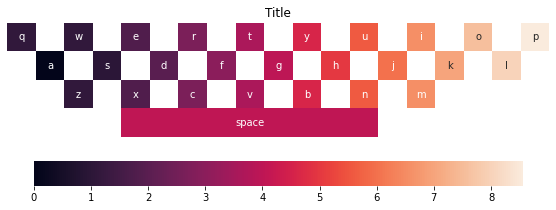

In [9]:
#HEATMAP - INTERACTIVE

labz = [
    ['q','','w','','e','','r','','t','','y','','u','','i','','o','','p'],
    ['','a','','s','','d','','f','','g','','h','','j','','k','','l',''],
    ['','','z','','x','','c','','v','','b','','n','','m','','','',''],
    ['','','','','','','','','space','','','','','','','','','','']
]

# in pivot: 'y' is the index of rows, 'x' index of columns and 'dist' the value
_ = df_heat.pivot('y', 'x', 'dist') # <--- Change here 'dist' to the column you want
plt.figure(figsize=(10,3))
plt.axis('off')
plt.title("Title")
sns.heatmap(_, annot=labz, fmt='', square=True, cbar_kws = dict(use_gridspec=False,location="bottom"))


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import unique
from numpy import where

In [11]:
# X_prova = df
# X_prova = X_prova.loc[X_prova['View'] == 'a']
#
# X_prova = X_prova.mean(axis=0)
# X_prova

In [12]:
df_kmeans = df.drop(['User','Hand', 'Smartphone'], axis=1)

df_kmeans = df_kmeans.groupby(['View', 'x', 'y','dist'], as_index=False).agg('mean')

col_heat = df_kmeans[['View', 'x', 'y','dist']]

df_kmeans = df_kmeans.drop(['View', 'x', 'y','dist'], axis=1)

col_heat

,View,x,y,dist
0,,5.0,3,4.031129
1,a,1.5,1,0.000000
2,b,6.0,2,4.609772
3,c,4.0,2,2.692582
4,d,3.5,1,2.000000
5,e,3.0,0,1.802776
6,f,4.5,1,3.000000
7,g,5.5,1,4.000000
8,h,6.5,1,5.000000
9,i,8.0,0,6.576473


In [13]:
clusters = []
test = []

for k in range(1, 28):

    model_kmeans = KMeans(n_clusters=k)
    # fit the model
    model_kmeans.fit(df_kmeans)
    train_labels = model_kmeans.labels_
    # assign a cluster to each example
    test_labels = model_kmeans.predict(df_kmeans)

    df_kmeans[str(k) + '_clusters'] = test_labels
    col_heat[str(k) + '_clusters'] = test_labels

    test.append(test_labels)

    # retrieve unique clusters
    cluster = unique(test_labels)
    clusters.append(cluster)



col_heat.to_csv(r'C:\Users\giuli\Desktop\col_heat_left.csv', index = False, header=True)

df_kmeans

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,-0.159617,-0.154432,-0.821499,-0.968070,-0.166154,-0.121125,-0.268387,-0.252487,-0.800617,-0.959769,...,2,8,8,10,8,4,8,0,1,26
1,-0.442607,-0.414158,-0.674681,-0.909059,-0.411576,-0.427211,-0.214514,-0.204382,-0.782626,-0.956852,...,3,0,15,13,15,13,2,15,12,18
2,0.033203,0.023504,-0.788821,-0.954436,0.030797,0.058167,-0.064265,-0.055183,-0.731566,-0.929734,...,5,5,1,3,3,3,9,3,25,23
3,-0.110353,-0.109572,-0.829623,-0.968095,-0.119691,-0.071302,-0.190139,-0.176394,-0.775892,-0.949086,...,4,2,4,7,1,1,1,24,5,24
4,-0.171691,-0.166162,-0.843684,-0.974481,-0.181909,-0.127884,-0.137639,-0.129050,-0.797555,-0.959752,...,0,7,5,0,21,5,0,10,11,12
5,-0.219282,-0.213487,-0.830212,-0.972243,-0.222810,-0.173440,-0.059955,-0.056102,-0.783213,-0.954289,...,0,7,5,0,4,21,7,8,20,9
6,-0.110754,-0.111648,-0.824161,-0.969190,-0.118787,-0.072111,-0.095583,-0.091578,-0.760467,-0.946641,...,4,2,4,7,1,22,21,2,3,8
7,-0.017499,-0.022905,-0.832367,-0.971224,-0.030099,0.015641,-0.078895,-0.075061,-0.739438,-0.928469,...,5,5,1,3,3,3,9,3,7,25
8,0.102653,0.091987,-0.794797,-0.960715,0.092600,0.121151,0.026417,0.029330,-0.703457,-0.917600,...,9,15,13,16,13,7,5,20,6,4
9,0.289857,0.268957,-0.735985,-0.930639,0.286954,0.288349,0.284271,0.274837,-0.723675,-0.922597,...,13,1,17,15,5,17,17,12,4,19


In [14]:
df_kmeans.index = col_heat.index

df_kmeans[['View', 'x', 'y', 'dist']] = col_heat[['View', 'x', 'y', 'dist']]

# df_kmeans

In [15]:
SPACEBAR_LEN = 9
BLOCK_SIZE = 0.5
space_x_k = col_heat['x'][0]

for i in range(SPACEBAR_LEN):
    new_block_k = space_x_k - (SPACEBAR_LEN - 1) / 2 * BLOCK_SIZE + i * BLOCK_SIZE
    print(space_x_k, new_block_k)
    if new_block_k == space_x_k:
        continue

    # append the other rows for spacebar draw
    col_heat = col_heat.append(col_heat.loc[[0] * 1].assign(**{'x': new_block_k}), ignore_index=True)

col_heat

5.0 3.0
5.0 3.5
5.0 4.0
5.0 4.5
5.0 5.0
5.0 5.5
5.0 6.0
5.0 6.5
5.0 7.0


,View,x,y,dist,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,,5.0,3,4.031129,0,0,1,0,1,2,...,2,8,8,10,8,4,8,0,1,26
1,a,1.5,1,0.000000,0,0,1,3,3,4,...,3,0,15,13,15,13,2,15,12,18
2,b,6.0,2,4.609772,0,0,2,2,2,1,...,5,5,1,3,3,3,9,3,25,23
3,c,4.0,2,2.692582,0,0,1,0,1,2,...,4,2,4,7,1,1,1,24,5,24
4,d,3.5,1,2.000000,0,0,1,0,1,2,...,0,7,5,0,21,5,0,10,11,12
5,e,3.0,0,1.802776,0,0,1,0,1,2,...,0,7,5,0,4,21,7,8,20,9
6,f,4.5,1,3.000000,0,0,1,0,1,2,...,4,2,4,7,1,22,21,2,3,8
7,g,5.5,1,4.000000,0,0,2,2,2,1,...,5,5,1,3,3,3,9,3,7,25
8,h,6.5,1,5.000000,0,0,2,2,2,1,...,9,15,13,16,13,7,5,20,6,4
9,i,8.0,0,6.576473,0,1,0,1,0,3,...,13,1,17,15,5,17,17,12,4,19


In [16]:
# Create heatmap of KMeans

take_out = ['x', 'y', 'dist', 'View']

for col in col_heat.columns:
    if col in take_out:
        continue
    name_split = col.split("_")
    n_cluster = int(name_split[0])
    _ = col_heat.pivot('y', 'x', col) # col takes all values of letters
    plt.figure(figsize=(24,14))
    plt.axis('off')
    plt.title("Heatmap: " + col)
    sns.heatmap(_, annot=labz, fmt='', square=True, cbar_kws = dict(use_gridspec=False, location="bottom", ticks=range(0, n_cluster+1)))
    plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\clusters_heatmap\\" + col + "_heat.png", bbox_inches='tight')
    plt.close()

In [17]:
# df = pd.merge(df, col_heat, how="left", on=["View"])
col_heat_base = col_heat

col_heat_base = col_heat_base.iloc[:-8, :] #remove rows for creation of spacebar
col_heat_base = col_heat_base.drop(['x', 'y','dist'], axis=1)
col_heat_base.to_csv(r'C:\Users\giuli\Desktop\col_heat_base_left.csv', index = False, header=True)
col_heat_base

,View,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,,0,0,1,0,1,2,0,0,1,...,2,8,8,10,8,4,8,0,1,26
1,a,0,0,1,3,3,4,2,4,4,...,3,0,15,13,15,13,2,15,12,18
2,b,0,0,2,2,2,1,5,7,3,...,5,5,1,3,3,3,9,3,25,23
3,c,0,0,1,0,1,2,0,0,8,...,4,2,4,7,1,1,1,24,5,24
4,d,0,0,1,0,1,2,0,0,8,...,0,7,5,0,21,5,0,10,11,12
5,e,0,0,1,0,1,2,0,0,8,...,0,7,5,0,4,21,7,8,20,9
6,f,0,0,1,0,1,2,0,0,8,...,4,2,4,7,1,22,21,2,3,8
7,g,0,0,2,2,2,1,5,7,3,...,5,5,1,3,3,3,9,3,7,25
8,h,0,0,2,2,2,1,5,1,0,...,9,15,13,16,13,7,5,20,6,4
9,i,0,1,0,1,0,3,4,3,5,...,13,1,17,15,5,17,17,12,4,19


In [18]:
dict_col_heat_base = {}

dict_col_heat_base['View'] = col_heat_base['View'].tolist()
for i in range(1, 28):
    dict_col_heat_base[str(i) + '_clusters'] = col_heat_base[str(i) + '_clusters'].tolist()

path_col_heat_base = 'C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\col_heat_base_left.json'

# Creat json and save to file
json_col_heat_base = json.dumps(dict_col_heat_base, indent=4)
with open(path_col_heat_base, 'w') as file:
    file.write(json_col_heat_base)

In [19]:
#aggiunge al df le colonne dei cluster

df_clus = df

df_clus = pd.merge(df_clus, col_heat_base, how="left", on=["View"])

df_clus.to_csv(r'C:\Users\giuli\Desktop\df_clus_left.csv', index = False, header=True)

# df = df_clus
#
# df

df_clus

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,-0.132653,-0.147185,-0.603221,-0.921283,0.032926,-0.109151,0.273847,0.271777,-0.630290,-0.931657,...,1,11,9,20,19,18,20,19,18,7
1,-0.021683,-0.003086,-0.550748,-0.899086,0.045203,-0.114663,0.140869,0.087105,-0.473945,-0.861633,...,9,15,13,16,13,7,5,20,6,4
2,-0.085178,-0.086068,-0.557407,-0.902056,0.027346,-0.081589,0.209052,0.189288,-0.663520,-0.943391,...,0,7,5,0,4,21,7,8,20,9
3,-0.276150,-0.278387,-0.611171,-0.924406,-0.190848,-0.311467,0.018891,0.021238,-0.675163,-0.947240,...,2,8,8,10,8,4,8,0,1,26
4,-0.069426,-0.068126,-0.800858,-0.980171,-0.066965,-0.066703,-0.186420,-0.175745,-0.781213,-0.976066,...,1,11,9,1,18,19,11,6,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,-0.094617,-0.091114,-0.974706,-0.999680,-0.141182,-0.024254,-0.288535,-0.281008,-0.975331,-0.999696,...,2,8,8,10,8,4,8,0,1,26
16758,-0.337784,-0.329409,-0.968054,-0.999490,-0.364956,-0.248069,-0.052138,-0.015699,-0.662813,-0.943152,...,11,12,2,6,14,16,15,5,8,11
16759,-0.442860,-0.411833,-0.905203,-0.995507,-0.460381,-0.364941,-0.085882,-0.088337,-0.983483,-0.999864,...,3,0,15,13,15,13,2,15,12,18
16760,-0.058369,-0.059153,-1.000000,-1.000000,-0.109373,0.017642,-0.024612,-0.027394,-1.000000,-1.000000,...,4,2,4,7,1,1,1,24,5,24


In [20]:
df_clus1 = df_clus
labels_cluster = []

dict_labels = {}

for i in range(2, 28):
    # save all columns of clusters
    labels_cluster.append(df_clus1[str(i) + '_clusters'])
    dict_labels[str(i) + '_clusters'] = df_clus1[str(i) + '_clusters'].tolist()

df_clus1 = df_clus1.iloc[:, :-27]

df_clus1
# labels_cluster


,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreVar,PreMax,PreMin,View,User,Hand,Smartphone,x,y,dist
0,-0.132653,-0.147185,-0.603221,-0.921283,0.032926,-0.109151,0.273847,0.271777,-0.630290,-0.931657,...,-1.0,-1.0,-1.0,t,Chiara,LEFT,REALME 7,5.0,0,3.640055
1,-0.021683,-0.003086,-0.550748,-0.899086,0.045203,-0.114663,0.140869,0.087105,-0.473945,-0.861633,...,-1.0,-1.0,-1.0,h,Chiara,LEFT,REALME 7,6.5,1,5.000000
2,-0.085178,-0.086068,-0.557407,-0.902056,0.027346,-0.081589,0.209052,0.189288,-0.663520,-0.943391,...,-1.0,-1.0,-1.0,e,Chiara,LEFT,REALME 7,3.0,0,1.802776
3,-0.276150,-0.278387,-0.611171,-0.924406,-0.190848,-0.311467,0.018891,0.021238,-0.675163,-0.947240,...,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7,5.0,3,4.031129
4,-0.069426,-0.068126,-0.800858,-0.980171,-0.066965,-0.066703,-0.186420,-0.175745,-0.781213,-0.976066,...,-1.0,-1.0,-1.0,r,Chiara,LEFT,REALME 7,4.0,0,2.692582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,-0.094617,-0.091114,-0.974706,-0.999680,-0.141182,-0.024254,-0.288535,-0.281008,-0.975331,-0.999696,...,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7,5.0,3,4.031129
16758,-0.337784,-0.329409,-0.968054,-0.999490,-0.364956,-0.248069,-0.052138,-0.015699,-0.662813,-0.943152,...,-1.0,-1.0,-1.0,z,Chiara,LEFT,REALME 7,2.0,2,1.118034
16759,-0.442860,-0.411833,-0.905203,-0.995507,-0.460381,-0.364941,-0.085882,-0.088337,-0.983483,-0.999864,...,-1.0,-1.0,-1.0,a,Chiara,LEFT,REALME 7,1.5,1,0.000000
16760,-0.058369,-0.059153,-1.000000,-1.000000,-0.109373,0.017642,-0.024612,-0.027394,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,c,Chiara,LEFT,REALME 7,4.0,2,2.692582


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [22]:
# compare machine learning algorithms

models = []
models.append(('RFC', "RandomForestClassifier", RandomForestClassifier(n_estimators = 100, random_state = 42)))
models.append(('NB', "GaussianNB", GaussianNB()))
models.append(('SVM', "SVC", SVC(C=1.0, kernel='linear', gamma='auto', random_state=42)))
models.append(('CART', "DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)))
models.append(('ADA', "AdaBoostClassifier", AdaBoostClassifier(n_estimators=100, learning_rate=0.1)))
models.append(('LR', "LogisticRegression", LogisticRegression(solver='liblinear', random_state = 42)))
models.append(('KNN', "KNeighborsClassifier", KNeighborsClassifier(weights='distance', n_neighbors=30, n_jobs=-1)))

In [23]:
# Compare clusters accuracy

features = df_clus1.drop(['View','User','Hand', 'Smartphone', 'x', 'y','dist'], axis=1)
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [24]:
RFC = []
NB = []
SVM = []
CART = []
ADA = []
LR = []
KNN = []

In [25]:
for idx, label in enumerate(labels_cluster):

    labels = label

    # print(features)
    # print(labels)

    print(features.shape, labels.shape)

    # train test split
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
    for train_index, test_index in sss.split(features, labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

    print("Train:", len(X_train), len(y_train), "Test:", len(X_test), len(y_test))



    # print number of occurrences for each letters
    a, b = np.unique(y_test, return_counts=True)
    print(dict(zip(a, b)))

    # evaluate each model in turn
    results = []
    names = []
    hue = []
    predictions = []

    y_pred_result = []

    for name, full_name, model in models:

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

        if name == 'RFC':
            RFC.append(accuracy)
        elif name == 'NB':
            NB.append(accuracy)
        elif name == 'SVM':
            SVM.append(accuracy)
        elif name == 'CART':
            CART.append(accuracy)
        elif name == 'ADA':
            ADA.append(accuracy)
        elif name == 'LR':
            LR.append(accuracy)
        elif name == 'KNN':
            KNN.append(accuracy)

        y_pred_result.append(y_pred)
        predictions.append((full_name, y_pred))
        results.append(accuracy)
        names.append(name)
        hue.append(full_name + ": " + str(accuracy) + "%")

        print('%s: %f' % (name, accuracy))

        # print(y_pred)
        # print(len(y_pred))


    # plot ACCURACY of ML Algorithm
    #
    # graphData = pd.DataFrame({'names':names,'results':results, 'algorithm':hue})
    # fig = pyplot.figure(figsize=(24,14), dpi=80)
    # pyplot.title(str(idx+2) + ' Clusters Accuracy', fontweight='bold')
    # plt_bar = sns.barplot(x='names', y='results', data=graphData, hue='algorithm', dodge=False)
    # pyplot.xlabel("algorithm", fontweight='bold')
    # pyplot.ylabel("accuracy", fontweight='bold')
    # plt.yticks(np.arange(0, 105, 5))
    # plt.setp(plt_bar.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(plt_bar.get_legend().get_title(), fontsize='16', fontweight='bold') # for legend title
    # pyplot.savefig("C:\\Users\\giuli\\Desktop\\image\\clusters_accuracy\\" + str(idx+2) + "_clusters_accuracy.png",
    #                bbox_inches='tight')
    # # pyplot.show()
    # pyplot.close()

(16762, 276) (16762,)
Train: 11733 11733 Test: 5029 5029
{0: 3597, 1: 1432}
RFC: 93.100000
NB: 89.780000
SVM: 93.540000
CART: 90.240000
ADA: 92.880000
LR: 93.440000
KNN: 92.600000
(16762, 276) (16762,)
Train: 11733 11733 Test: 5029 5029
{0: 1162, 1: 2568, 2: 1299}
RFC: 84.830000
NB: 77.150000
SVM: 84.330000
CART: 77.090000
ADA: 82.720000
LR: 83.930000
KNN: 82.480000
(16762, 276) (16762,)
Train: 11733 11733 Test: 5029 5029
{0: 2114, 1: 1162, 2: 1299, 3: 454}
RFC: 79.580000
NB: 70.890000
SVM: 78.760000
CART: 70.350000
ADA: 73.750000
LR: 78.640000
KNN: 77.110000
(16762, 276) (16762,)
Train: 11733 11733 Test: 5029 5029
{0: 1162, 1: 2114, 2: 1030, 3: 454, 4: 269}
RFC: 75.980000
NB: 64.310000
SVM: 76.400000
CART: 64.450000
ADA: 70.790000
LR: 75.320000
KNN: 74.230000
(16762, 276) (16762,)
Train: 11733 11733 Test: 5029 5029
{0: 407, 1: 1030, 2: 2113, 3: 756, 4: 454, 5: 269}
RFC: 71.290000
NB: 59.690000
SVM: 70.510000
CART: 57.940000
ADA: 62.560000
LR: 69.100000
KNN: 67.610000
(16762, 276) (167

In [26]:
# set width of bars
bar_width = 0.12
xtick_distance = 0.35

# Set position of bar on X axis
r1 = np.arange(26)
r2 = [xindex + bar_width for xindex in r1]
r3 = [xindex + bar_width for xindex in r2]
r4 = [xindex + bar_width for xindex in r3]
r5 = [xindex + bar_width for xindex in r4]
r6 = [xindex + bar_width for xindex in r5]
r7 = [xindex + bar_width for xindex in r6]

# Make the plot of all clusters
plt.figure(figsize = (60,16), dpi=100)
plt.bar(r1, RFC, width=bar_width, edgecolor='white', label='RandomForestClassifier')
plt.bar(r2, NB, width=bar_width, edgecolor='white', label='GaussianNB')
plt.bar(r3, SVM, width=bar_width, edgecolor='white', label='SVC')
plt.bar(r4, CART, width=bar_width, edgecolor='white', label='DecisionTreeClassifier')
plt.bar(r5, ADA, width=bar_width, edgecolor='white', label='AdaBoostClassifier')
plt.bar(r6, LR, width=bar_width, edgecolor='white', label='LogisticRegression')
plt.bar(r7, KNN, width=bar_width, edgecolor='white', label='KNeighborsClassifier')

# Add xticks and yticks on the middle of the group bars
plt.xlabel('clusters', fontweight='bold', fontsize=20)
plt.title("Clusters Accuracy", fontweight='bold', fontsize=20)
plt.yticks(np.arange(0, 105, 5), fontsize=20)
# plt.xticks(np.arange(0, 3, 1), range(2, 5))
plt.xticks([r + xtick_distance for r in range(26)], range(2, 28), fontsize=20)
# create legend, save graphic
plt.legend(prop={"size":25})

plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\" + "accuracy_clusters_bar.png",
                bbox_inches='tight')
plt.close()

In [27]:
# set width of bars
bar_width = 0.10
xtick_distance = 0.30

# Set position of bar on X axis
r1 = np.arange(13)
r2 = [xindex + bar_width for xindex in r1]
r3 = [xindex + bar_width for xindex in r2]
r4 = [xindex + bar_width for xindex in r3]
r5 = [xindex + bar_width for xindex in r4]
r6 = [xindex + bar_width for xindex in r5]
r7 = [xindex + bar_width for xindex in r6]

# Make plot of first part of clusters
plt.figure(figsize = (24, 10), dpi=100)
plt.bar(r1, RFC[:13], width=bar_width, edgecolor='white', label='RandomForestClassifier')
plt.bar(r2, NB[:13], width=bar_width, edgecolor='white', label='GaussianNB')
plt.bar(r3, SVM[:13], width=bar_width, edgecolor='white', label='SVC')
plt.bar(r4, CART[:13], width=bar_width, edgecolor='white', label='DecisionTreeClassifier')
plt.bar(r5, ADA[:13], width=bar_width, edgecolor='white', label='AdaBoostClassifier')
plt.bar(r6, LR[:13], width=bar_width, edgecolor='white', label='LogisticRegression')
plt.bar(r7, KNN[:13], width=bar_width, edgecolor='white', label='KNeighborsClassifier')

# Add xticks and yticks on the middle of the group bars
plt.xlabel('clusters', fontweight='bold')
plt.title("Clusters Accuracy", fontweight='bold')
plt.yticks(np.arange(0, 105, 5))
# plt.xticks(np.arange(0, 3, 1), range(2, 5))
plt.xticks([r + xtick_distance for r in range(13)], range(2, 15))
# create legend, save graphic
plt.legend(prop={"size":12})

plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\" + "accuracy_clusters_bar_first.png",
                bbox_inches='tight')
plt.close()


# Make plot of second part of clusters
plt.figure(figsize = (24, 10), dpi=100)
plt.bar(r1, RFC[13:], width=bar_width, edgecolor='white', label='RandomForestClassifier')
plt.bar(r2, NB[13:], width=bar_width, edgecolor='white', label='GaussianNB')
plt.bar(r3, SVM[13:], width=bar_width, edgecolor='white', label='SVC')
plt.bar(r4, CART[13:], width=bar_width, edgecolor='white', label='DecisionTreeClassifier')
plt.bar(r5, ADA[13:], width=bar_width, edgecolor='white', label='AdaBoostClassifier')
plt.bar(r6, LR[13:], width=bar_width, edgecolor='white', label='LogisticRegression')
plt.bar(r7, KNN[13:], width=bar_width, edgecolor='white', label='KNeighborsClassifier')

# Add xticks and yticks on the middle of the group bars
plt.xlabel('clusters', fontweight='bold')
plt.title("Clusters Accuracy", fontweight='bold')
plt.yticks(np.arange(0, 105, 5))
# plt.xticks(np.arange(0, 3, 1), range(2, 5))
plt.xticks([r + xtick_distance for r in range(13)], range(15, 28))
# create legend, save graphic
plt.legend(prop={"size":12})

plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\" + "accuracy_clusters_bar_second.png",
                bbox_inches='tight')
plt.close()

In [28]:
path_accuracy_clusters = 'C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\accuracy_clusters_left.json'

dict_ = {'RFC': RFC, 'NB': NB, 'SVM': SVM, 'CART': CART, 'ADA': ADA, 'LR': LR, 'KNN': KNN}

# Creat json and save to file
json_accuracy = json.dumps(dict_, indent=4)
with open(path_accuracy_clusters, 'w') as file:
    file.write(json_accuracy)

In [29]:
path_labels_clusters = 'C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\labels_clusters_left.json'

json_labels = json.dumps(dict_labels, indent=4)
with open(path_labels_clusters, 'w') as file:
    file.write(json_labels)

In [30]:
df_labels_clusters = pd.read_json('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\labels_clusters_left.json')
df_labels_clusters
# f = open('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\accuracy_clusters.json', )
# data = json.load(f)
# RRR = []
# for i in data['RFC']:
#     RFC.append(i)
# for i in data['NB']:
#     NB.append(i)
# for i in data['SVM']:
#     SVM.append(i)
# for i in data['CART']:
#     CART.append(i)
# for i in data['ADA']:
#     ADA.append(i)
# for i in data['LR']:
#     LR.append(i)
# for i in data['KNN']:
#     KNN.append(i)
#
# f.close()
# print(RFC)

,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters,11_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,0,2,2,2,1,5,1,0,4,5,...,1,11,9,20,19,18,20,19,18,7
1,0,2,2,2,1,5,1,0,4,5,...,9,15,13,16,13,7,5,20,6,4
2,0,1,0,1,2,0,0,8,1,2,...,0,7,5,0,4,21,7,8,20,9
3,0,1,0,1,2,0,0,1,0,4,...,2,8,8,10,8,4,8,0,1,26
4,0,2,2,2,1,5,1,0,4,5,...,1,11,9,1,18,19,11,6,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,0,1,0,1,2,0,0,1,0,4,...,2,8,8,10,8,4,8,0,1,26
16758,0,1,0,1,2,6,6,7,8,8,...,11,12,2,6,14,16,15,5,8,11
16759,0,1,3,3,4,2,4,4,9,0,...,3,0,15,13,15,13,2,15,12,18
16760,0,1,0,1,2,0,0,8,1,2,...,4,2,4,7,1,1,1,24,5,24


In [4]:
df_accuracy_clusters = pd.read_json('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\accuracy_clusters_left.json')

df_accuracy_clusters


,RFC,NB,SVM,CART,ADA,LR,KNN
0,93.10,89.78,93.54,90.24,92.88,93.44,92.60
1,84.83,77.15,84.33,77.09,82.72,83.93,82.48
2,79.58,70.89,78.76,70.35,73.75,78.64,77.11
3,75.98,64.31,76.40,64.45,70.79,75.32,74.23
4,71.29,59.69,70.51,57.94,62.56,69.10,67.61
5,69.16,50.61,69.32,56.85,58.30,68.34,66.75
6,66.00,51.18,66.63,53.23,55.94,64.84,63.31
7,56.33,45.48,57.13,41.44,42.83,55.72,53.11
8,55.30,45.00,56.49,41.20,43.61,55.30,52.73
9,53.49,40.70,54.42,40.25,40.64,52.58,50.27


In [5]:
# Grafico a linee accuracy clusters

x_line = np.linspace(2, 27, 26)
y = df_accuracy_clusters

plt.figure(figsize=(30,18))

plt.plot(x_line, y, marker="x")
plt.yticks(fontsize=16)
plt.xticks(np.linspace(2, 27, 26), range(2, 28), fontsize=18)

plt.legend(['RandomForestClassifier', 'GaussianNB', 'SVC', 'DecisionTreeClassifier', 'AdaBoostClassifier',
            'LogisticRegression', 'KNeighborsClassifier'], loc='upper right', prop={"size":20})

plt.ylabel("Accuracy", fontsize="10")
plt.xlabel("Clusters", fontsize="10")

plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\" + "line_graph_clusters.png",
                bbox_inches='tight')

plt.close()